<a href="https://colab.research.google.com/github/nongquocdat/AI/blob/main/Phan_loai_trai_cay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

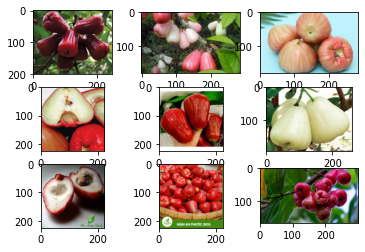

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/train/trai_cay/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'man'+str(i+1)+'.jfif'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [4]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/train/trai_cay/'
photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('tao'):
    output = 0
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('man'):
    output = 1
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('xoai'):
    output = 2
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('oi'):
    output = 3
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('saurieng'):
    output = 4
    photo = load_img(folder+file,target_size=(200,200))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('10foods_photos.npy', photos)
save('10foods_labels.npy', labels)

(35, 200, 200, 3) (35,)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten 

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', 
                 input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 5s 294ms/step - loss: 1542.6636 - accuracy: 0.1429
Epoch 2/50
2/2 [==============================] - 3s 284ms/step - loss: 13349.5410 - accuracy: 0.1714
Epoch 3/50
2/2 [==============================] - 3s 560ms/step - loss: 4810.0483 - accuracy: 0.1714
Epoch 4/50
2/2 [==============================] - 5s 440ms/step - loss: 812.3368 - accuracy: 0.2000
Epoch 5/50
2/2 [==============================] - 4s 456ms/step - loss: 558.1387 - accuracy: 0.3143
Epoch 6/50
2/2 [==============================] - 4s 537ms/step - loss: 219.4897 - accuracy: 0.4000
Epoch 7/50
2/2 [==============================] - 5s 500ms/step - loss: 61.0261 - accuracy: 0.4000
Epoch 8/50
2/2 [==============================] - 4s 544ms/step - loss: 149.5620 - accuracy: 0.2571
Epoch 9/50
2/2 [==============================] - 4s 352ms/step - loss: 32.4751 - accuracy: 0.4571
Epoch 10/50
2/2 [==============================] - 3s 293ms/step - loss: 20.9969 - accuracy: 0.628

2/2 [==============================] - 2s 104ms/step - loss: 0.0172 - accuracy: 1.0000


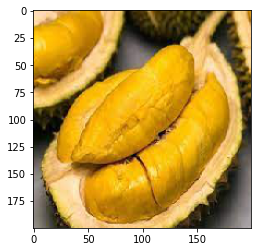

In [7]:
model.evaluate(photos,labels)
model.save('5loai_trai_cay_Final.h5')
from keras.models import load_model
models=load_model('5loai_trai_cay_Final.h5')
classes = ["tao","man","xoai","oi","saurieng",]
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('saurieng3.jfif', target_size=(200,200))
plt.imshow(img)

In [8]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.09298712 0.08029573 0.09256076 0.10731982 0.1369387  0.07154822
  0.07055698 0.10330243 0.07942357 0.06960745 0.09545913]]


'saurieng'